ConvNet classifier
=================

The second exercise is to build a Convolutional Neural Network to distuingish dogs from cats.

In [1]:
from pathlib import Path
import os
import zipfile

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

The following command will downlaod the dataset:

In [2]:
TMP_DIR = Path("/tmp")
ZIPFILE = TMP_DIR / "cats_and_dogs_filtered.zip"
BASE_DIR = TMP_DIR / "cats_and_dogs_filtered"

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O $ZIPFILE

--2019-03-20 20:30:45--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com... 2a00:1450:400e:80c::2010, 172.217.168.208
Connecting to storage.googleapis.com|2a00:1450:400e:80c::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: '/tmp/cats_and_dogs_filtered.zip'

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  11.8MB/s    in 5.6s    

2019-03-20 20:30:52 (11.7 MB/s) - '/tmp/cats_and_dogs_filtered.zip' saved [68606236/68606236]



In [4]:
zipf = zipfile.ZipFile(ZIPFILE, "r")
zipf.extractall(TMP_DIR)
zipf.close()

Let's see what we just downloaded! We will use the linux command `ls`. The exclamation mark tells the notebook that we're executing a command-line instruction istead of a Python instruction:

In [5]:
!ls $BASE_DIR

train        validation   vectorize.py


In [6]:
!ls $BASE_DIR/train

cats dogs


In [7]:
!ls $BASE_DIR/train/dogs|head -n 5

dog.0.jpg
dog.1.jpg
dog.10.jpg
dog.100.jpg
dog.101.jpg


In [8]:
!ls $BASE_DIR/train/cats|head -n 5

cat.0.jpg
cat.1.jpg
cat.10.jpg
cat.100.jpg
cat.101.jpg


Let's create some convenient variables to access these directories:

In [9]:
TRAIN_DIR = BASE_DIR / "train"
VAL_DIR = BASE_DIR / "validation"

TRAIN_DOG_DIR = TRAIN_DIR / "dogs"
TRAIN_CAT_DIR = TRAIN_DIR / "cats"

VAL_DOG_DIR = VAL_DIR / "dogs"
VAL_CAT_DIR = VAL_DIR / "cats"

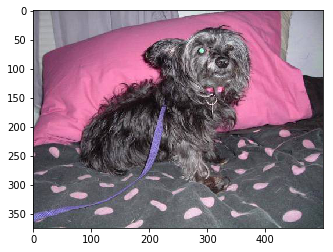

In [10]:
plt.imshow(plt.imread(TRAIN_DOG_DIR / "dog.0.jpg"))

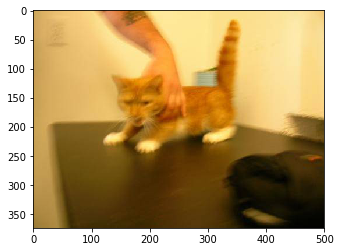

In [11]:
plt.imshow(plt.imread(TRAIN_CAT_DIR / "cat.0.jpg"))

Feel free to convince yourself that the other images are also dogs and cats.

**Question**: Is this dataset balanced or not?

In [12]:
len(list(TRAIN_DOG_DIR.glob("*.jpg")))

1000

In [13]:
# YOUR CODE HERE: check the number of files in TRAIN_CAT_DIR

What do you conclude on the use of the **accuracy** metric for this dataset?

# A simple ConvNet from scratch

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Exercise: check the dimensions of the images.**

Use `plt.imread()`, as above, to read on the cat or dog images. This function returns a numpy array. Check the shape of the numpy array.

For example, if `a` is a numpy array, you may call `a.shape` to get the shape.

The shape is in `(y, x, depth)`: the number of pixels in the y-direction (height), the number tof pixels in the x-direction (width) and the number of channels (3 for each primary color). 

In [15]:
# YOUR CODE HERE


plt.imread(TRAIN_CAT_DIR / "cat.0.jpg").shape

(374, 500, 3)

Now assign **half** of these numbers to DIM_Y and DIM_X below.
That's right, we're resizing the image to be half of the original. This speeds things up and still allows us to reach reasonable performance.

In [17]:
# YOUR CODE HERE
DIM_Y = 
DIM_X = 


DIM_Y = 374 // 2
DIM_X = 500 // 2

We are now going to build the model.

We will build 3 groups of Convolution + MaxPooling. The first group has already been initialized below:

In [18]:
model = Sequential()
model.add(Conv2D(16, 3, input_shape=(DIM_Y, DIM_X, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

For the second group, add a Conv2D with 32 filters, a ReLU activation, and a MaxPooling2D with pool size of 2.

In [21]:
# YOUR CODE HERE


model.add(Conv2D(32, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

The third group is the same, except increase the number of convolution filters to 64:

In [20]:
# YOUR CODE HERE


model.add(Conv2D(64, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

Now, use `Flatten()` to go back to 1 dimension, and add a fully-connected layer with 512 nodes. Use `Dense(512)` to do that. Finally, use the ReLU activation function again:

In [22]:
# YOUR CODE HERE


model.add(Flatten()) 
model.add(Dense(512)) 
model.add(Activation('relu'))

We end with a Sigmoid node (`Dense(1)` with sigmoid activation function")

In [24]:
# YOUR CODE HERE


model.add(Dense(1))
model.add(Activation('sigmoid'))

In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
batch_size = 16

train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(DIM_Y, DIM_X),
    batch_size=batch_size,
    class_mode="binary")

val_datagen = ImageDataGenerator(rescale=1/255)
val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(DIM_Y, DIM_X),
    batch_size=batch_size,
    class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [26]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [27]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=20,
        validation_data=val_generator,
        validation_steps=1000 // batch_size
)

Epoch 1/20
125/125 [==============================] - 120s 959ms/step - loss: 0.6933 - acc: 0.4960 - val_loss: 0.6931 - val_acc: 0.5010
Epoch 2/20
125/125 [==============================] - 112s 893ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5010
Epoch 3/20
125/125 [==============================] - 119s 952ms/step - loss: 0.6932 - acc: 0.4870 - val_loss: 0.6931 - val_acc: 0.5010
Epoch 4/20
125/125 [==============================] - 115s 923ms/step - loss: 0.6932 - acc: 0.4830 - val_loss: 0.6931 - val_acc: 0.5010
Epoch 5/20
 72/125 [================>.............] - ETA: 42s - loss: 0.6932 - acc: 0.5052

KeyboardInterrupt: 

How did this go? Did you manage to get reasonable accuracy?

## Data augmentations

One thing that we can do to improve results, is to "augment" our training data. We can add new training images by applying random transformations on the existing images.

In the `ImageDataGenerator` above, that we assigned to `train_datagen`, we can add optional transformations.
For example:

    shear_range=0.05,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True 
    
Below, we'll define a new `ImageDataGenerator` with augmentations. Select a couple from above, or all, and feel free to change parameters to get more or less extreme augmentations.

In [ ]:
train_datagen_aug = ImageDataGenerator(
    rescale=1/255,
    # YOUR CODE HERE: data augmentations
)
train_generator_aug = train_datagen_aug.flow_from_directory(
    TRAIN_DIR,
    target_size=(DIM_Y, DIM_X),
    batch_size=batch_size,
    class_mode="binary")



In [ ]:
train_datagen_aug = ImageDataGenerator(
    rescale=1/255,
    shear_range=0.05,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True 
)
train_generator_aug = train_datagen_aug.flow_from_directory(
    TRAIN_DIR,
    target_size=(DIM_Y, DIM_X),
    batch_size=batch_size,
    class_mode="binary")

Let's see some results:

In [ ]:
    shear_range=0.05,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True